C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/20
844/844 - 3s - 4ms/step - accuracy: 0.8232 - loss: 0.4963 - val_accuracy: 0.8512 - val_loss: 0.4106
Epoch 2/20
844/844 - 3s - 3ms/step - accuracy: 0.8686 - loss: 0.3613 - val_accuracy: 0.8718 - val_loss: 0.3488
Epoch 3/20
844/844 - 2s - 3ms/step - accuracy: 0.8799 - loss: 0.3258 - val_accuracy: 0.8743 - val_loss: 0.3524
Epoch 4/20
844/844 - 2s - 3ms/step - accuracy: 0.8871 - loss: 0.3032 - val_accuracy: 0.8762 - val_loss: 0.3375
Epoch 5/20
844/844 - 2s - 3ms/step - accuracy: 0.8948 - loss: 0.2822 - val_accuracy: 0.8792 - val_loss: 0.3227
Epoch 6/20
844/844 - 2s - 3ms/step - accuracy: 0.9011 - loss: 0.2675 - val_accuracy: 0.8853 - val_loss: 0.3218
Epoch 7/20
844/844 - 3s - 3ms/step - accuracy: 0.9049 - loss: 0.2539 - val_accuracy: 0.8785 - val_loss: 0.3321
Epoch 8/20
844/844 - 3s - 3ms/step - accuracy: 0.9079 - loss: 0.2433 - val_accuracy: 0.8737 - val_loss: 0.3505
Epoch 9/20
844/844 - 3s - 3ms/step - accuracy: 0.9136 - loss: 0.2312 - val_accuracy: 0.8802 - val_loss: 0.3424
E

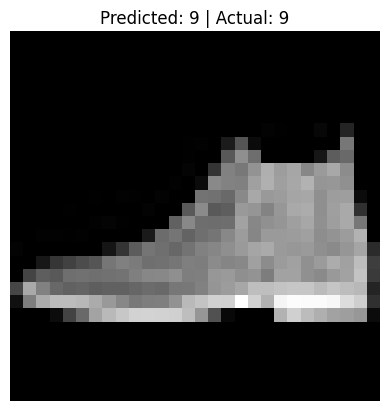

In [1]:
# ===============================================================
# 🧠 Deep Learning Model — Modern Activations & Initializers
# ===============================================================

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load and preprocess data

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build the model
# -----------------------------
# We'll demonstrate a few advanced activation techniques here:
# - He Normal initializer (best for ReLU)
# - GELU activation (used in Transformers)
# - LeakyReLU for improved gradient flow

model = keras.Sequential([
    # Flatten 2D image (28x28) to 1D vector (784)
    layers.Flatten(input_shape=(28, 28)),

    # Hidden Layer 1 — ReLU + He Normal
    layers.Dense(256, activation='relu', kernel_initializer='he_normal'),

    # Hidden Layer 2 — GELU (Gaussian Error Linear Unit)
    layers.Dense(128, activation='gelu', kernel_initializer='glorot_normal'),

    # Hidden Layer 3 — LeakyReLU with custom alpha
    layers.Dense(64, kernel_initializer='he_normal'),
    layers.LeakyReLU(alpha=0.1),   # small negative slope keeps neurons alive

    # Output Layer — Softmax for 10-class classification
    layers.Dense(10, activation='softmax')
])

#Compile the model

# Adam optimizer handles adaptive learning rate
# Cross-entropy loss for multi-class classification
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
# -----------------------------
# verbose=2 → concise one-line output per epoch
history = model.fit(
    X_train, y_train,
    epochs=20,              # more epochs since we’re deeper
    batch_size=64,          # balances performance and stability
    validation_split=0.1,   # 10% validation data
    verbose=2
)

#  Evaluate on test data
# -----------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")

#Example Prediction

import numpy as np
import matplotlib.pyplot as plt

index = 0
pred = model.predict(X_test)
predicted_label = np.argmax(pred[index])
true_label = y_test[index]

plt.imshow(X_test[index], cmap="gray")
plt.title(f"Predicted: {predicted_label} | Actual: {true_label}")
plt.axis("off")
plt.show()
